In [2]:
# load the module
%load_ext autoreload
%autoreload 2

import sys 
sys.path.append("../../../Qtensor")
sys.path.append("../../../Qtensor/qtree_git")
sys.path.append("../../..")

from qtensor import ZZQtreeQAOAComposer, ZZQtreeQAOAComposer_MIS, ZZQtreeQAOAComposer_MAXCUT
from qtensor import QAOAQtreeSimulator, QAOAQtreeSimulator_MIS, QAOAQtreeSimulator_MAXCUT
from qtensor.contraction_backends import TorchBackend
import Generating_Problems as Generator
from Calculating_Expectation_Values import SingleLayerQAOAExpectationValues, QtensorQAOAExpectationValuesMIS,QtensorQAOAExpectationValuesMAXCUT, QtensorQAOAExpectationValuesQUBO
from QIRO import QIRO_MIS
import torch
import qtensor
import networkx as nx
import numpy as np
from scipy.optimize import minimize
import tqdm
from scipy.optimize import Bounds
import pprint
from functools import partial
import random
import json
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
import matplotlib.pyplot as plt
import matplotlib
from IPython.display import set_matplotlib_formats
%matplotlib inline
__plot_height = 2.719
matplotlib.rcParams['figure.figsize'] = (1.618*__plot_height, __plot_height)
set_matplotlib_formats('svg')

/var/folders/vn/wn770g9j5cs9fkglk9xmggcm0000gp/T/ipykernel_75220/1482671039.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


## MIS: 50 nodes regular graph with RMSprop

In [4]:
reg = 3
n = 50
seed = 666
p=1
G = nx.random_regular_graph(reg, n, seed = seed)
#G = nx.random_geometric_graph(30, 0.5)
#G = nx.gnp_random_graph(n, 0.5, seed = seed)
num_runs=10
problem = Generator.MIS(G)

In [5]:
expectation_values_single = SingleLayerQAOAExpectationValues(problem)
expectation_values_single.optimize()
energy_single = expectation_values_single.energy
print(energy_single)

/Users/Q642074/Environments/env5/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/Q642074/Environments/env5/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


-8.748834571390029


In [ ]:
colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
p=[1, 2, 3]

for p in p:
    print(f"\nRight now calculating p = {p}\n")
    energy_difference = []
    x=[]
    for i in range(num_runs):
        expectation_values_qtensor = QtensorQAOAExpectationValuesMIS(problem, p)
        expectation_values_qtensor.optimize()
        energy_qtensor = float(expectation_values_qtensor.energy)
        print(energy_qtensor)
        energy_difference.append((energy_single-energy_qtensor)/energy_qtensor)
        x.append(i+1)

    plt.scatter(x, energy_difference, color=colors[p-1], label=f'p={p}')
    plt.legend()

In [23]:
plt.show()

[autoreload of qtensor failed: Traceback (most recent call last):
  File "/Users/q619238/Environments/env5/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/Users/q619238/Environments/env5/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 471, in superreload
    module = reload(module)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 850, in exec_module
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/q619238/qiro/Parameter_optimisation/../Qtensor/qtensor/__init__.py", line 11, in <module>
    from .CircuitComposer import QAOAComposer, OldQAOAComposer, ZZQAOAComposer, WeightedZZQAOAComposer, CircuitComposer, ZZQAOAComposer_MIS, 

## MAXCUT: 50 nodes 3 regular graph with RMSprop

In [3]:
reg = 3
n = 50
seed = 666
p=1
G = nx.random_regular_graph(reg, n)
#G = nx.random_geometric_graph(30, 0.5)
#G = nx.gnp_random_graph(n, 0.5, seed = seed)
num_runs=1
problem = Generator.MAXCUT(G)

In [4]:
expectation_values_single = SingleLayerQAOAExpectationValues(problem)
expectation_values_single.optimize()
energy_single = expectation_values_single.energy
print(energy_single)

/Users/Q642074/Environments/env5/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


-28.210483815889088



 Energy analytic expression for p=1:  -28.210483815889088

Right now calculating learning rate = 0.001

Right now calculating p = 1


Energy random initialization for p=1:  -28.08318379192692

Energy fixed angles optimization for p=1:  -28.21063259901812
------------------------------------------------------------


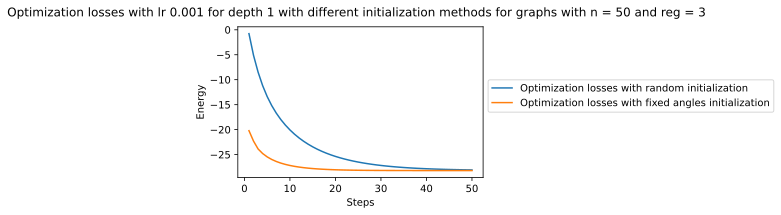


Right now calculating p = 2


Energy random initialization for p=2:  -32.7357464830434

Energy fixed angles optimization for p=2:  -37.583294730811446
Energy transition states p=2:  -39.77858201843235
------------------------------------------------------------


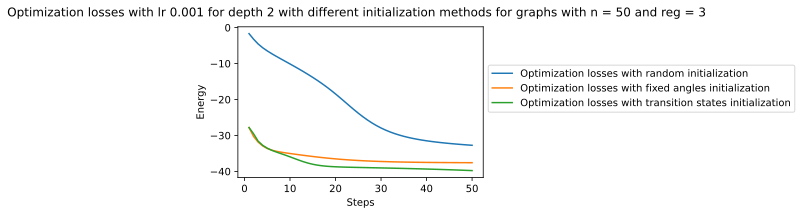

############################################################

Right now calculating learning rate = 0.01

Right now calculating p = 1


Energy random initialization for p=1:  -28.210760188563512

Energy fixed angles optimization for p=1:  -28.21105059901849
------------------------------------------------------------


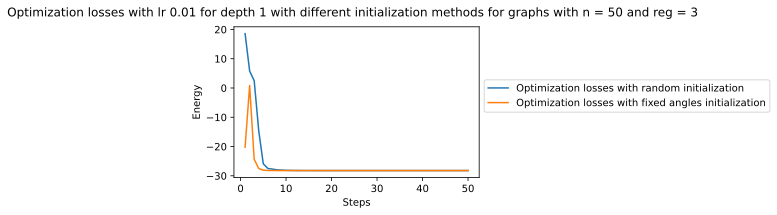


Right now calculating p = 2


Energy random initialization for p=2:  -37.491340018793004

Energy fixed angles optimization for p=2:  -34.57649186983983
Energy transition states p=2:  -42.74734166399762
------------------------------------------------------------


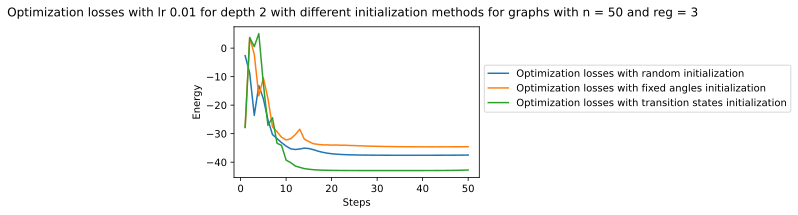

############################################################

Right now calculating learning rate = 0.05

Right now calculating p = 1


Energy random initialization for p=1:  -28.00125241159807

Energy fixed angles optimization for p=1:  -7.419929318756281
------------------------------------------------------------


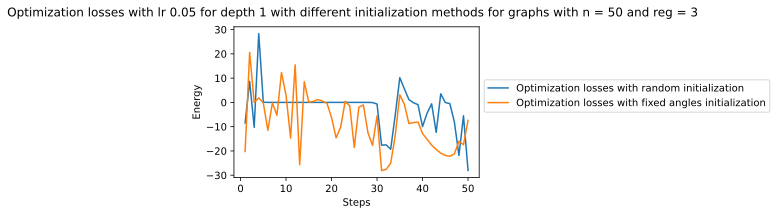


Right now calculating p = 2


Energy random initialization for p=2:  -31.148608485748902

Energy fixed angles optimization for p=2:  -5.950301353538445
Energy transition states p=2:  -4.827598410405325
------------------------------------------------------------


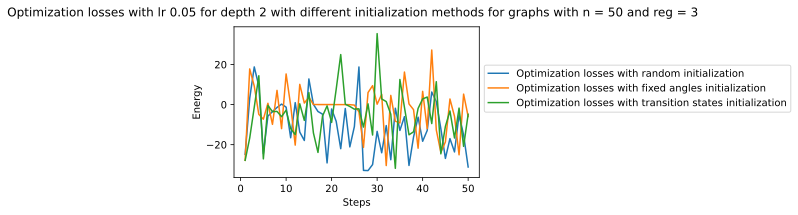

############################################################

Right now calculating learning rate = 0.1

Right now calculating p = 1


Energy random initialization for p=1:  0.0010422175211502998

Energy fixed angles optimization for p=1:  20.498125151867203
------------------------------------------------------------


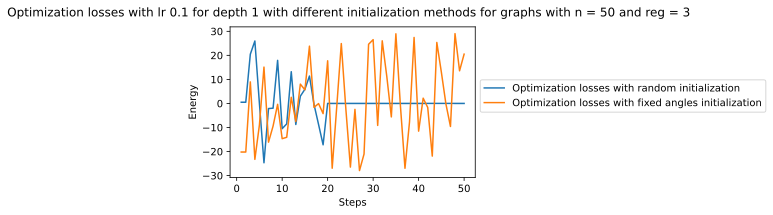


Right now calculating p = 2


Energy random initialization for p=2:  0.09229749767135484

Energy fixed angles optimization for p=2:  -18.47355179657367
Energy transition states p=2:  -0.14469536747075248
------------------------------------------------------------


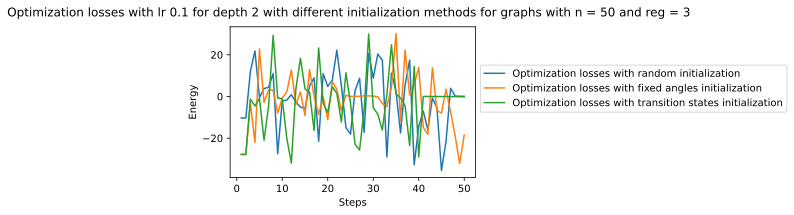

############################################################


In [5]:
colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
ps=[1, 2]#, 3]
learning_rates = [0.001, 0.01, 0.05, 0.1]
print(f'\n Energy analytic expression for p=1: ', energy_single)

with open('angles_regular_graphs.json', 'r') as file:
    data = json.load(file)

for learning_rate in learning_rates:
    print(f"\nRight now calculating learning rate = {learning_rate}")
    for p in ps:
        print(f"\nRight now calculating p = {p}\n")
        energy_difference = []
        x=[]
        fig = plt.figure()
        fig.suptitle(f'Optimization losses with lr {learning_rate} for depth {p} with different initialization methods for graphs with n = {n} and reg = {reg}')
        
        for i in range(num_runs):
            
            expectation_values_qtensor= QtensorQAOAExpectationValuesMAXCUT(problem, p, pbar=False)
            expectation_values_qtensor.optimize(lr=learning_rate)
            energy_qtensor = float(expectation_values_qtensor.energy)
            losses = expectation_values_qtensor.losses.copy()
            print(f'\nEnergy random initialization for p={p}: ', energy_qtensor)
            x = list(range(1, len(losses)+1))
            plt.plot(x, losses, colors[0], label=f'Optimization losses with random initialization')

            gamma, beta = data[f"{reg}"][f"{p}"]["gamma"], data[f"{reg}"][f"{p}"]["beta"]
            gamma, beta = [value/(-2*np.pi) for value in gamma], [value/(2*np.pi) for value in beta]
            expectation_values_qtensor = QtensorQAOAExpectationValuesMAXCUT(problem, p, pbar=False, gamma=gamma, beta=beta)
            expectation_values_qtensor.optimize(lr=learning_rate)
            energy_qtensor = float(expectation_values_qtensor.energy)
            losses = expectation_values_qtensor.losses.copy()
            print(f'\nEnergy fixed angles optimization for p={p}: ', energy_qtensor)
            plt.plot(x, losses, colors[1], label=f'Optimization losses with fixed angles initialization')
        
#transition states initialization
        if p==1:
            expectation_values_single_transition = SingleLayerQAOAExpectationValues(problem)
            expectation_values_single_transition.optimize()
            gamma = [expectation_values_single_transition.gamma]
            beta = [expectation_values_single_transition.beta]
            energy_single_transition = expectation_values_single_transition.energy

        else:
            for j in range(p):
                gamma_ts=gamma.copy()
                beta_ts=beta.copy()
                gamma_ts.insert(j, 0)
                beta_ts.insert(j, 0)
                expectation_values_qtensor = QtensorQAOAExpectationValuesMAXCUT(problem, p, pbar=False, gamma=gamma_ts, beta=beta_ts, )
                expectation_values_qtensor.optimize(lr=learning_rate)
                energy_qtensor_transition = float(expectation_values_qtensor.energy)

                if j==0:
                    energy_min=energy_qtensor_transition
                    gamma_min=[float(i) for i in expectation_values_qtensor.gamma]
                    beta_min=[float(i) for i in expectation_values_qtensor.beta]
                    losses = expectation_values_qtensor.losses.copy()

                if energy_qtensor_transition < energy_min:
                    energy_min=energy_qtensor_transition
                    gamma_min=[float(i) for i in expectation_values_qtensor.gamma]
                    beta_min=[float(i) for i in expectation_values_qtensor.beta]
                    losses = expectation_values_qtensor.losses.copy()
        if p != 1:
            plt.plot(x, losses, colors[2], label=f'Optimization losses with transition states initialization')
            print(f'Energy transition states p={p}: ', energy_min)


        print(60*'-')
        #plt.scatter(x, energy_difference, color=colors[p-1], label=f'p={p}')
        plt.ylabel('Energy')
        plt.xlabel('Steps')
        plt.legend(loc='lower left', bbox_to_anchor=(1,0.4))  
        plt.show()

    print(60*'#')

## MAXCUT: 50 nodes 3 regular graph with ADAM

In [6]:
expectation_values_single = SingleLayerQAOAExpectationValues(problem)
expectation_values_single.optimize()
energy_single = expectation_values_single.energy
print(f'\n Energy analytic expression for p=1: ', energy_single)


 Energy analytic expression for p=1:  -28.210483815889088



 Energy analytic expression for p=1:  -28.210483815889088

Right now calculating learning rate = 0.001

Right now calculating p = 1


Energy random initialization for p=1:  -1.1854302013038704

Energy fixed angles optimization for p=1:  -27.500633819405603


/Users/Q642074/Environments/env5/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


------------------------------------------------------------


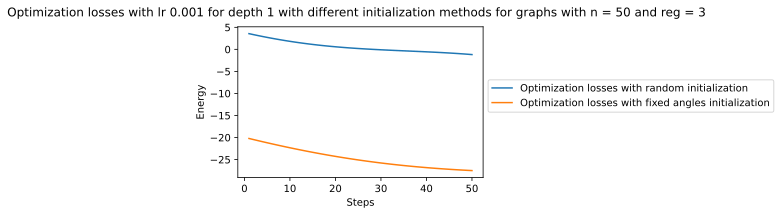


Right now calculating p = 2


Energy random initialization for p=2:  -32.43502726901306

Energy fixed angles optimization for p=2:  -35.116750786355546
Energy transition states p=2:  -37.91613893618119
------------------------------------------------------------


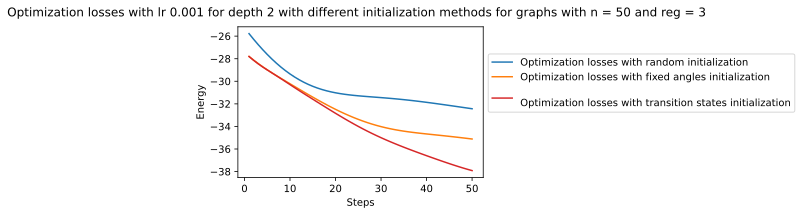

############################################################

Right now calculating learning rate = 0.005

Right now calculating p = 1


Energy random initialization for p=1:  -28.045262666998568

Energy fixed angles optimization for p=1:  -28.18349345827942
------------------------------------------------------------


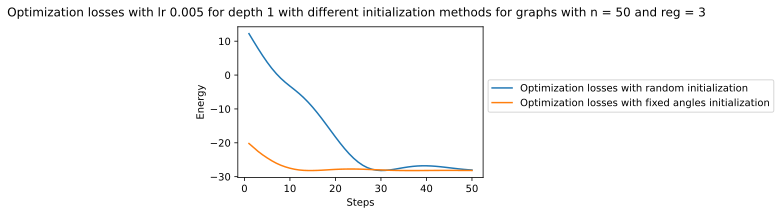


Right now calculating p = 2


Energy random initialization for p=2:  -30.907442015242875

Energy fixed angles optimization for p=2:  -37.59815659998712
Energy transition states p=2:  -42.50494934326819
------------------------------------------------------------


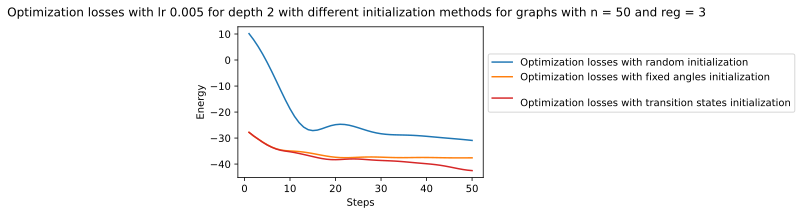

############################################################

Right now calculating learning rate = 0.01

Right now calculating p = 1


Energy random initialization for p=1:  -28.190519567023063

Energy fixed angles optimization for p=1:  -28.206010882614862
------------------------------------------------------------


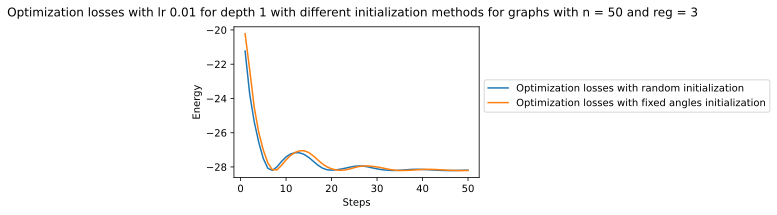


Right now calculating p = 2


Energy random initialization for p=2:  -31.605472779596393

Energy fixed angles optimization for p=2:  -37.5983078520398
Energy transition states p=2:  -42.55289052736017
------------------------------------------------------------


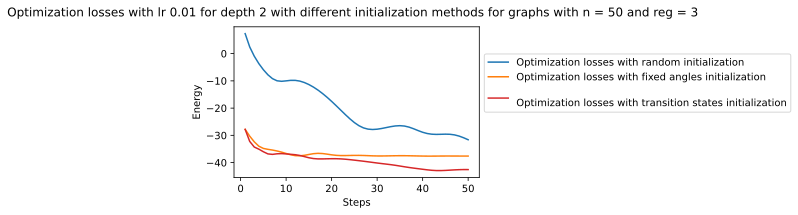

############################################################


In [9]:
colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
ps=[1, 2]#, 3]
learning_rates = [0.001, 0.005, 0.01]
print(f'\n Energy analytic expression for p=1: ', energy_single)

with open('angles_regular_graphs.json', 'r') as file:
    data = json.load(file)

for learning_rate in learning_rates:
    print(f"\nRight now calculating learning rate = {learning_rate}")
    for p in ps:
        print(f"\nRight now calculating p = {p}\n")
        energy_difference = []
        x=[]
        fig = plt.figure()
        fig.suptitle(f'Optimization losses with lr {learning_rate} for depth {p} with different initialization methods for graphs with n = {n} and reg = {reg}')
        
        for i in range(num_runs):
            
            expectation_values_qtensor_random = QtensorQAOAExpectationValuesMAXCUT(problem, p, pbar=False)
            expectation_values_qtensor_random.optimize(Opt=torch.optim.Adam, lr=learning_rate)
            energy_qtensor_random = float(expectation_values_qtensor_random.energy)
            losses_random = expectation_values_qtensor_random.losses.copy()
            print(f'\nEnergy random initialization for p={p}: ', energy_qtensor_random)

            gamma, beta = data[f"{reg}"][f"{p}"]["gamma"], data[f"{reg}"][f"{p}"]["beta"]
            gamma, beta = [value/(-2*np.pi) for value in gamma], [value/(2*np.pi) for value in beta]
            expectation_values_qtensor_fixed_optim = QtensorQAOAExpectationValuesMAXCUT(problem, p, pbar=False, gamma=gamma, beta=beta)
            expectation_values_qtensor_fixed_optim.optimize(Opt=torch.optim.Adam, lr=learning_rate)
            energy_qtensor_fixed_optim = float(expectation_values_qtensor_fixed_optim.energy)
            losses_fixed_optim = expectation_values_qtensor_fixed_optim.losses.copy()
            print(f'\nEnergy fixed angles optimization for p={p}: ', energy_qtensor_fixed_optim)
            
            x = list(range(1, len(losses_random)+1))

            plt.plot(x, losses_random, colors[0], label=f'Optimization losses with random initialization')
            plt.plot(x, losses_fixed_optim, colors[1], label=f'Optimization losses with fixed angles initialization')
        
#transition states initialization
        if p==1:
            expectation_values_single_transition = SingleLayerQAOAExpectationValues(problem)
            expectation_values_single_transition.optimize()
            gamma = [expectation_values_single_transition.gamma]
            beta = [expectation_values_single_transition.beta]
            energy_single_transition = expectation_values_single_transition.energy

        else:
            for j in range(p):
                gamma_ts=gamma.copy()
                beta_ts=beta.copy()
                gamma_ts.insert(j, 0)
                beta_ts.insert(j, 0)
                expectation_values_qtensor_transition = QtensorQAOAExpectationValuesMAXCUT(problem, p, pbar=False, gamma=gamma_ts, beta=beta_ts, )
                expectation_values_qtensor_transition.optimize(Opt=torch.optim.Adam, lr=learning_rate)
                energy_qtensor_transition = float(expectation_values_qtensor_transition.energy)

                if j==0:
                    energy_min=energy_qtensor_transition
                    gamma_min=[float(i) for i in expectation_values_qtensor_transition.gamma]
                    beta_min=[float(i) for i in expectation_values_qtensor_transition.beta]
                    losses_min = expectation_values_qtensor_transition.losses.copy()

                if energy_qtensor_transition < energy_min:
                    energy_min=energy_qtensor_transition
                    gamma_min=[float(i) for i in expectation_values_qtensor_transition.gamma]
                    beta_min=[float(i) for i in expectation_values_qtensor_transition.beta]
                    losses_min = expectation_values_qtensor_transition.losses.copy()
        if p != 1:
            plt.plot(x, losses_min, colors[3], label=f'\nOptimization losses with transition states initialization')
            print(f'Energy transition states p={p}: ', energy_min)


        print(60*'-')
        #plt.scatter(x, energy_difference, color=colors[p-1], label=f'p={p}')
        plt.ylabel('Energy')
        plt.xlabel('Steps')
        plt.legend(loc='lower left', bbox_to_anchor=(1,0.4)) 
        plt.show() 

    print(60*'#')

## MAXCUT: 50 nodes 3 regular graph with SGD

In [10]:
expectation_values_single = SingleLayerQAOAExpectationValues(problem)
expectation_values_single.optimize()
energy_single = expectation_values_single.energy
print(f'\n Energy analytic expression for p=1: ', energy_single)


 Energy analytic expression for p=1:  -28.210483815889088



 Energy analytic expression for p=1:  -28.210483815889088

Right now calculating learning rate = 0.0001

Right now calculating p = 1


Energy random initialization for p=1:  -28.211050599036955

Energy fixed angles optimization for p=1:  -28.211050599037005


/Users/Q642074/Environments/env5/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


------------------------------------------------------------


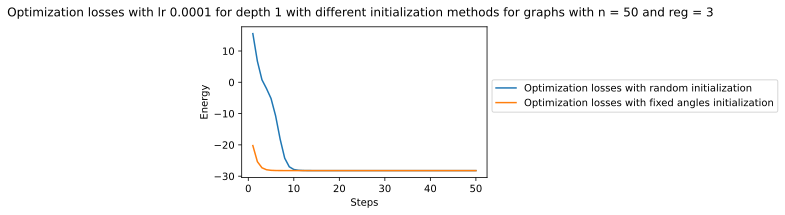


Right now calculating p = 2


Energy random initialization for p=2:  -37.61581500987689

Energy fixed angles optimization for p=2:  -37.61846705301919
Energy transition states p=2:  -40.76768691447819
------------------------------------------------------------


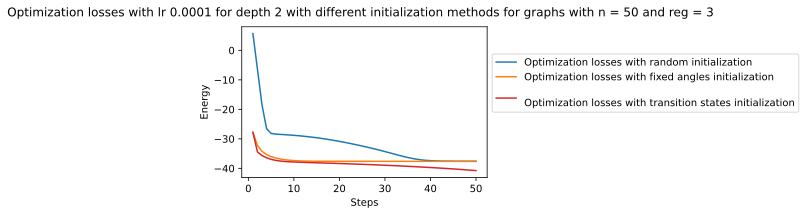

############################################################

Right now calculating learning rate = 0.001

Right now calculating p = 1


Energy random initialization for p=1:  -12.18188193683148

Energy fixed angles optimization for p=1:  19.144822302668416
------------------------------------------------------------


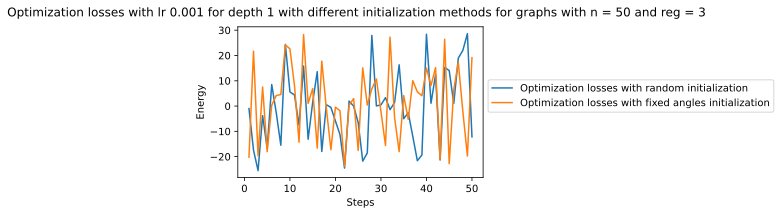


Right now calculating p = 2


Energy random initialization for p=2:  -11.898218950312943

Energy fixed angles optimization for p=2:  -9.375787326145861
Energy transition states p=2:  -0.32897324211419143
------------------------------------------------------------


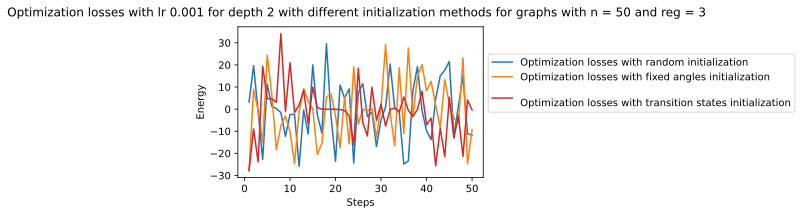

############################################################

Right now calculating learning rate = 0.005

Right now calculating p = 1


Energy random initialization for p=1:  -6.967477118969098

Energy fixed angles optimization for p=1:  -3.8481871798450604
------------------------------------------------------------


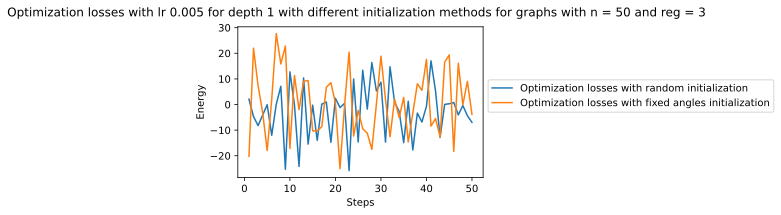


Right now calculating p = 2


Energy random initialization for p=2:  6.800936189977376

Energy fixed angles optimization for p=2:  -10.529774412895856
Energy transition states p=2:  -1.0465586741853896
------------------------------------------------------------


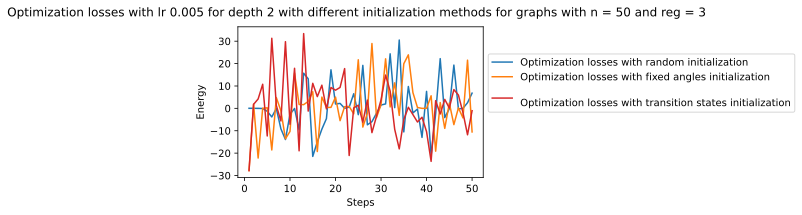

############################################################

Right now calculating learning rate = 0.01

Right now calculating p = 1


Energy random initialization for p=1:  4.0288729842266715

Energy fixed angles optimization for p=1:  -0.003953759149396637
------------------------------------------------------------


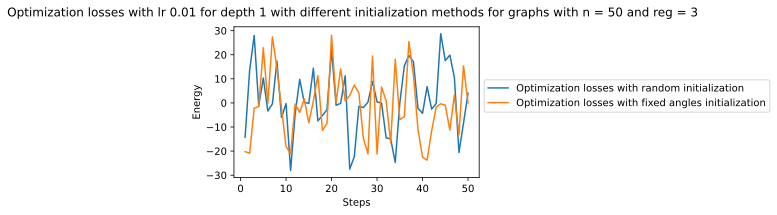


Right now calculating p = 2


Energy random initialization for p=2:  21.280205817888156

Energy fixed angles optimization for p=2:  1.5937363433826275
Energy transition states p=2:  0.700272054153297
------------------------------------------------------------


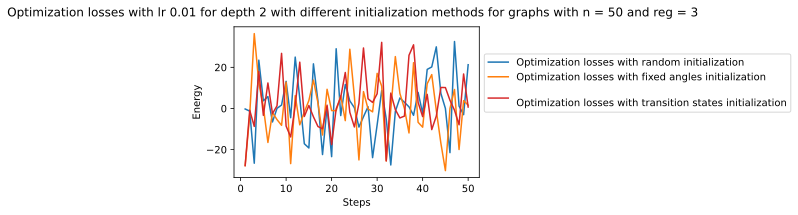

############################################################


In [12]:
colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
ps=[1, 2]#, 3]
learning_rates = [0.0001, 0.001, 0.005, 0.01]
print(f'\n Energy analytic expression for p=1: ', energy_single)

with open('angles_regular_graphs.json', 'r') as file:
    data = json.load(file)

for learning_rate in learning_rates:
    print(f"\nRight now calculating learning rate = {learning_rate}")
    for p in ps:
        print(f"\nRight now calculating p = {p}\n")
        energy_difference = []
        x=[]
        fig = plt.figure()
        fig.suptitle(f'Optimization losses with lr {learning_rate} for depth {p} with different initialization methods for graphs with n = {n} and reg = {reg}')
        
        for i in range(num_runs):
            
            expectation_values_qtensor_random = QtensorQAOAExpectationValuesMAXCUT(problem, p, pbar=False)
            expectation_values_qtensor_random.optimize(Opt=torch.optim.SGD, lr=learning_rate)
            energy_qtensor_random = float(expectation_values_qtensor_random.energy)
            losses_random = expectation_values_qtensor_random.losses.copy()
            print(f'\nEnergy random initialization for p={p}: ', energy_qtensor_random)

            gamma, beta = data[f"{reg}"][f"{p}"]["gamma"], data[f"{reg}"][f"{p}"]["beta"]
            gamma, beta = [value/(-2*np.pi) for value in gamma], [value/(2*np.pi) for value in beta]
            expectation_values_qtensor_fixed_optim = QtensorQAOAExpectationValuesMAXCUT(problem, p, pbar=False, gamma=gamma, beta=beta)
            expectation_values_qtensor_fixed_optim.optimize(Opt=torch.optim.SGD, lr=learning_rate)
            energy_qtensor_fixed_optim = float(expectation_values_qtensor_fixed_optim.energy)
            losses_fixed_optim = expectation_values_qtensor_fixed_optim.losses.copy()
            print(f'\nEnergy fixed angles optimization for p={p}: ', energy_qtensor_fixed_optim)
            
            x = list(range(1, len(losses_random)+1))

            plt.plot(x, losses_random, colors[0], label=f'Optimization losses with random initialization')
            plt.plot(x, losses_fixed_optim, colors[1], label=f'Optimization losses with fixed angles initialization')
        
#transition states initialization
        if p==1:
            expectation_values_single_transition = SingleLayerQAOAExpectationValues(problem)
            expectation_values_single_transition.optimize()
            gamma = [expectation_values_single_transition.gamma]
            beta = [expectation_values_single_transition.beta]
            energy_single_transition = expectation_values_single_transition.energy

        else:
            for j in range(p):
                gamma_ts=gamma.copy()
                beta_ts=beta.copy()
                gamma_ts.insert(j, 0)
                beta_ts.insert(j, 0)
                expectation_values_qtensor_transition = QtensorQAOAExpectationValuesMAXCUT(problem, p, pbar=False, gamma=gamma_ts, beta=beta_ts, )
                expectation_values_qtensor_transition.optimize(Opt=torch.optim.SGD, lr=learning_rate)
                energy_qtensor_transition = float(expectation_values_qtensor_transition.energy)

                if j==0:
                    energy_min=energy_qtensor_transition
                    gamma_min=[float(i) for i in expectation_values_qtensor_transition.gamma]
                    beta_min=[float(i) for i in expectation_values_qtensor_transition.beta]
                    losses_min = expectation_values_qtensor_transition.losses.copy()

                if energy_qtensor_transition < energy_min:
                    energy_min=energy_qtensor_transition
                    gamma_min=[float(i) for i in expectation_values_qtensor_transition.gamma]
                    beta_min=[float(i) for i in expectation_values_qtensor_transition.beta]
                    losses_min = expectation_values_qtensor_transition.losses.copy()
        if p != 1:
            plt.plot(x, losses_min, colors[3], label=f'\nOptimization losses with transition states initialization')
            print(f'Energy transition states p={p}: ', energy_min)


        print(60*'-')
        #plt.scatter(x, energy_difference, color=colors[p-1], label=f'p={p}')
        plt.ylabel('Energy')
        plt.xlabel('Steps')
        plt.legend(loc='lower left', bbox_to_anchor=(1,0.4))  
        plt.show()

    print(60*'#')

In [6]:
graphs_list = list(range(0,10))
regularity=3
max_p=3
initializations_list = ['analytic', 'random', 'transition_states']# 'fixed_angles', 'fixed_angles_optimization']
optimizers_list = ['SGD', 'RMSprop', 'Adam']
learning_rates_SGD = [0.0001, 0.0005, 0.001]
learning_rates_RMSprop = [0.001, 0.005, 0.01, 0.05]
learning_rates_Adam = [0.001, 0.005, 0.01, 0.05]
ns=[50, 100, 150, 200]
arguments_list=[]
for n in ns:
    for graph in graphs_list:
        for init in initializations_list:
            if init=='analytic':
                arguments_list.append((graph, n, regularity, max_p, init, '', ''))

            elif init=='fixed_angles':
                arguments_list.append((graph, n, regularity, max_p, init, '', ''))

            else:
                for optimizer in optimizers_list:
                    if optimizer=='SGD':
                        for lr in learning_rates_SGD:
                            arguments_list.append((graph, n, regularity, max_p, init, optimizer, lr))
                    elif optimizer=='RMSprop':
                        for lr in learning_rates_RMSprop:
                            arguments_list.append((graph, n, regularity, max_p, init, optimizer, lr))
                    elif optimizer=='Adam':
                        for lr in learning_rates_Adam:
                            arguments_list.append((graph, n, regularity, max_p, init, optimizer, lr))
        
print(len(arguments_list))

276


In [12]:
graphs=[0, 1, 2, 3, 4]
optimizers_list = ['SGD', 'RMSprop', 'Adam']
learning_rates_SGD = [0.0001, 0.0005, 0.001]
learning_rates_RMSprop = [0.001, 0.005, 0.01, 0.05]
learning_rates_Adam = [0.001, 0.005, 0.01, 0.05]
ns=[50, 100, 150, 200]
arguments_list=[]
for n in ns:
    for graph in graphs:
        for optimizer in optimizers_list:
            if optimizer=='SGD':
                for lr in learning_rates_SGD:
                    arguments_list.append((graph, n, regularity, max_p, optimizer, lr))
            elif optimizer=='RMSprop':
                for lr in learning_rates_RMSprop:
                    arguments_list.append((graph, n, regularity, max_p, optimizer, lr))
            elif optimizer=='Adam':
                for lr in learning_rates_Adam:
                    arguments_list.append((graph, n, regularity, max_p, optimizer, lr))
        
num_processes=len(arguments_list)
print(num_processes)

220


In [50]:
import pickle
with open('rudis_100_regular_graphs_nodes_200_reg_3.pkl', 'rb') as file:
    data = pickle.load(file)

print(len(data))

print(data[0])

100
Graph with 200 nodes and 300 edges


Text(48, -39.38560062021142, '-39.38560062021142')

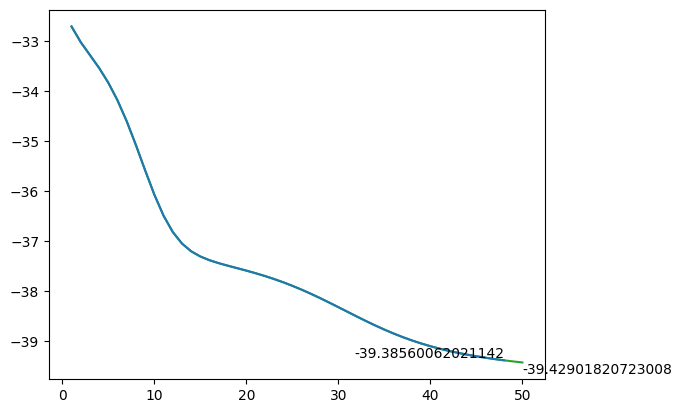

In [47]:
import os
import pickle
my_path = os.path.abspath("")
my_path = os.path.dirname(my_path)
p=3

with open(my_path + f'/data/nodes_{50}_reg_{3}_graph_{0}_opt_SGD_lr_{0.0001}.pkl', 'rb') as file:
    data = pickle.load(file)

losses = data['transition_states'][f'p={p}']['losses']
losses_short=[]
counter=0
for loss in losses:
    losses_short.append(loss)
    if len(losses_short)>1:
        
        #print(abs((losses_short[-1]-losses_short[-2])/losses[-1]))
        if abs((losses_short[-1]-losses_short[-2])/losses[-1])<0.001:
            counter += 1
            if counter == 5: 
                break
        else: 
            counter = 0



x_short = list(range(1, len(losses_short)+1))
x = list(range(1, len(losses)+1))
fig = plt.figure()
plt.plot(x, losses, color='tab:green')
plt.text(x[-1], losses[-1], losses[-1], ha='left', va='top')
plt.plot(x_short, losses_short, color='tab:blue')
plt.text(x_short[-1], losses_short[-1], losses_short[-1], ha='right', va='bottom')




In [ ]:
    colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

    with open(f'energies_reg_{reg}_nodes_{n}_version_{version}.pkl', 'rb') as file:
        data_list = pickle.load(file)

    

    for p in ps:
         
        fig = plt.figure()
        fig.suptitle(f'Optimization losses for depth {p} with different initialization methods for graphs with n = {n} and reg = {reg}')
        for i in range(num_runs):

            plt.subplot(3,4,i+1)
            losses_random_initialization = data_list[i]['random_init'][f'p={p}']['losses'].copy()
            losses_fixed_angles_initialization = data_list[i]['fixed_angles_optimization'][f'p={p}']['losses'].copy()

            if p != 1:
                losses_transition_states_initialization = data_list[i]['transition_states'][f'p={p}']['losses'].copy()
                plt.plot(x, losses_transition_states_initialization, colors[4], label=f'Optimization losses with transition states initialization')

            x = list(range(1, len(losses_fixed_angles_initialization)+1))

            plt.plot(x, losses_random_initialization, colors[1], label=f'Optimization losses with random initialization')
            plt.plot(x, losses_fixed_angles_initialization, colors[3], label=f'Optimization losses with fixed angles initialization')
            if i==0 or i==4 or i==8:
                plt.ylabel('Loss')
            if i==6 or i==7 or i==8 or i==9:
                plt.xlabel('Steps')
            #plt.xticks(ps, ps)
            plt.title(f'Run number {i+1}')

        plt.legend(loc='lower left', bbox_to_anchor=(1,0.4))
        fig.savefig(f'Losses_reg_{reg}_n_{n}_p_{p}_version_{version}.png')

## MAXCUT: 100 nodes regular graph with RMSprop

In [18]:
reg = 3
n = 100
seed = 666
p=10
G = nx.random_regular_graph(reg, n)
#G = nx.random_geometric_graph(30, 0.5)
#G = nx.gnp_random_graph(n, 0.5, seed = seed)
num_runs=10
problem = Generator.MAXCUT(G)

In [19]:
expectation_values_single = SingleLayerQAOAExpectationValues(problem)
expectation_values_single.optimize()
energy_single = expectation_values_single.energy
print(energy_single)

-56.74626783457414


In [20]:
colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
p=[1, 2, 3]

for p in p:
    print(f"\nRight now calculating p = {p}\n")
    energy_difference = []
    x=[]
    for i in range(num_runs):
        expectation_values_qtensor = QtensorQAOAExpectationValuesMAXCUT(problem, p)
        expectation_values_qtensor.optimize()
        energy_qtensor = float(expectation_values_qtensor.energy)
        print(energy_qtensor)
        energy_difference.append((energy_single-energy_qtensor)/energy_qtensor)
        x.append(i+1)

    plt.scatter(x, energy_difference, color=colors[p-1], label=f'p={p}')
    plt.legend()


Right now calculating p = 1

Graph with 100 nodes and 150 edges


  0%|          | 0/50 [00:00<?, ?it/s]

## MAXCUT: 150 nodes regular graph with RMSprop

In [3]:
reg = 3
n = 20
seed = 666
p=1
G = nx.random_regular_graph(reg, n)
#G = nx.random_geometric_graph(30, 0.5)
#G = nx.gnp_random_graph(n, 0.5, seed = seed)
num_runs=1
problem = Generator.MAXCUT(G)

In [ ]:
expectation_values_single = SingleLayerQAOAExpectationValues(problem)
expectation_values_single.optimize()
energy_single = expectation_values_single.energy
print(energy_single)

-27.888044324552396


In [137]:
colors=['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
p=[1, 2, 3]

for p in p:
    print(f"\nRight now calculating p = {p}\n")
    energy_difference = []
    x=[]
    for i in range(num_runs):
        expectation_values_qtensor = QtensorQAOAExpectationValuesMAXCUT(problem, p)
        expectation_values_qtensor.optimize()
        energy_qtensor = float(expectation_values_qtensor.energy)
        print(energy_qtensor)
        energy_difference.append((energy_single-energy_qtensor)/energy_qtensor)
        x.append(i+1)

    plt.scatter(x, energy_difference, color=colors[p-1], label=f'p={p}')
    plt.legend()


Right now calculating p = 1



  0%|          | 0/50 [00:00<?, ?it/s]

[9, 8, 3]
[(9, 8), (9, 3), (8, 3)]
-0.9830649246836047


NameError: name 'energy_single' is not defined

In [173]:
from RQAOA import *

reg = 3
n = 12
seed = 666
p=1
G = nx.random_regular_graph(reg, n, seed=seed)
#G = nx.random_geometric_graph(30, 0.5)
#G = nx.gnp_random_graph(n, 0.5, seed = seed)
num_runs=1
problem = Generator.MAXCUT(G)
expectation_values_single = SingleLayerQAOAExpectationValues(problem)
expectation_values_qtensor = QtensorQAOAExpectationValuesMAXCUT(problem, p)

shrinking_single = RQAOA(expectation_values_single, 3, type_of_problem="MAXCUT")
cuts_single, solution_single = shrinking_single.execute()


RQAOA Step: 1
RQAOA Step: 2
RQAOA Step: 3
RQAOA Step: 4
RQAOA Step: 5
RQAOA Step: 6
RQAOA Step: 7
RQAOA Step: 8
RQAOA Step: 9


In [179]:
from RQAOA import *

reg = 3
n = 12
seed = 666
p=1
G = nx.random_regular_graph(reg, n, seed=seed)
#G = nx.random_geometric_graph(30, 0.5)
#G = nx.gnp_random_graph(n, 0.5, seed = seed)
num_runs=1
problem = Generator.MAXCUT(G)
expectation_values_qtensor = QtensorQAOAExpectationValuesMAXCUT(problem, p)
expectation_values_qubo = QtensorQAOAExpectationValuesQUBO(problem, p)
shrinking_qtensor = RQAOA(expectation_values_qubo, 3, type_of_problem="MAXCUT")

cuts_qtensor, solution_qtensor = shrinking_qtensor.execute()

RQAOA Step: 1


  0%|          | 0/50 [00:00<?, ?it/s]

RQAOA Step: 2


  0%|          | 0/50 [00:00<?, ?it/s]

RQAOA Step: 3


  0%|          | 0/50 [00:00<?, ?it/s]

RQAOA Step: 4


  0%|          | 0/50 [00:00<?, ?it/s]

RQAOA Step: 5


  0%|          | 0/50 [00:00<?, ?it/s]

RQAOA Step: 6


  0%|          | 0/50 [00:00<?, ?it/s]

RQAOA Step: 7


  0%|          | 0/50 [00:00<?, ?it/s]

RQAOA Step: 8


  0%|          | 0/50 [00:00<?, ?it/s]

RQAOA Step: 9


  0%|          | 0/50 [00:00<?, ?it/s]

In [180]:
print('cuts single: ', cuts_single)
print('solution single: ', solution_single)
print('cuts qtensor: ', cuts_qtensor)
print('solution qtensor: ', solution_qtensor)

cuts single:  16
solution single:  [  1  -2   3   4   5  -6  -7   8  -9  10 -11 -12]
cuts qtensor:  16
solution qtensor:  [  1  -2   3   4   5  -6  -7   8  -9 -10 -11  12]


In [83]:
from RQAOA import *

reg = 3
n = 50
seed = 666
p=1
#G = nx.random_regular_graph(reg, n)
#G = nx.random_geometric_graph(30, 0.5)
#G = nx.gnp_random_graph(n, 0.5, seed = seed)
num_runs=1
problem = Generator.MAXCUT(G)
expectation_values_single = SingleLayerQAOAExpectationValues(problem)
shrinking = RQAOA(expectation_values_single, 5, type_of_problem="MAXCUT")

cuts, solution = shrinking.execute()

RQAOA Step: 1
5
node 5
graph nodes [9, 8, 0, 5, 12, 1, 13, 17, 16, 19, 7, 6, 14, 3, 18, 2, 11, 10, 15]
variable 5
position translater [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
position translater [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
RQAOA Step: 2
4
node 4
graph nodes [9, 8, 0, 5, 12, 1, 13, 17, 16, 19, 7, 6, 14, 18, 2, 11, 10, 15]
variable 4
position translater [0, 1, 2, 3, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
position translater [0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
RQAOA Step: 3
2
node 2
graph nodes [9, 8, 0, 5, 12, 13, 17, 16, 19, 7, 6, 14, 18, 2, 11, 10, 15]
variable 2
position translater [0, 1, 2, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
position translater [0, 1, 3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
RQAOA Step: 4
4
node 7
graph nodes [9, 8, 0, 5, 12, 13, 17, 16, 19, 7, 14, 18, 2, 11, 10, 15]
variable 7
position translater

In [84]:
print(cuts)

26


In [10]:

reg = 3
n = 4
seed = 666
p=1
G = nx.random_regular_graph(reg, n)
#G = nx.random_geometric_graph(30, 0.5)
#G = nx.gnp_random_graph(n, 0.5, seed = seed)
num_runs=1
problem = Generator.MIS(G)
#expectation_values_single = SingleLayerQAOAExpectationValues(problem)
#expectation_values_qtensor = QtensorQAOAExpectationValuesMAXCUT(problem, p)
print(problem.matrix)


[[0.    0.    0.    0.    0.   ]
 [0.    0.325 0.    0.    0.   ]
 [0.    0.275 0.325 0.    0.   ]
 [0.    0.275 0.275 0.325 0.   ]
 [0.    0.275 0.275 0.275 0.325]]


In [47]:

G = nx.random_regular_graph(reg, 6)
G.remove_node(0)
mapping = {v:i for i, v in enumerate(G.nodes())}
graph = nx.relabel_nodes(G, mapping, copy=True)
print(G.nodes())
print(graph.nodes())

[1, 2, 4, 3, 5]
[0, 1, 2, 3, 4]


In [181]:
reg = 3
n = 20
seed = 866
p=1
G = nx.random_regular_graph(reg, n, seed=seed)
#G = nx.random_geometric_graph(30, 0.5)
#G = nx.gnp_random_graph(n, 0.5, seed = seed)
num_runs=1
problem = Generator.MAXCUT(G)
expectation_values_single = SingleLayerQAOAExpectationValues(problem, gamma=[0.1], beta=[0.2])
expectation_values_qtensor = QtensorQAOAExpectationValuesMAXCUT(problem, p, gamma=[0.1], beta=[0.2])
expectation_values_qubo = QtensorQAOAExpectationValuesQUBO(problem, p, gamma=[0.1], beta=[0.2])
expectation_values_qubo.calc_expect_val()


([13, 1], 1.0, 0.4306609559634636)

In [182]:
expectation_values_single.calc_expect_val()

([13, 1], 1.0, 0.430661029667954)

In [183]:
expectation_values_qtensor.calc_expect_val()

([13, 1], 1.0, 0.4306609559634636)

In [122]:
print(expectation_values_single.expect_val_dict)


{frozenset({1}): 0.0, frozenset({2}): 0.0, frozenset({3}): 0.0, frozenset({4}): 0.0, frozenset({5}): 0.0, frozenset({6}): 0.0, frozenset({7}): 0.0, frozenset({8}): 0.0, frozenset({9}): 0.0, frozenset({10}): 0.0, frozenset({1, 2}): 0.43066102966795394, frozenset({3, 4}): 0.43066102966795394, frozenset({1, 5}): 0.2261271242968685, frozenset({1, 6}): 0.43066102966795394, frozenset({2, 6}): 0.43066102966795394, frozenset({2, 7}): 0.2261271242968685, frozenset({3, 7}): 0.43066102966795394, frozenset({4, 7}): 0.43066102966795394, frozenset({8, 3}): 0.2261271242968685, frozenset({8, 5}): 0.2261271242968685, frozenset({9, 6}): 0.2261271242968685, frozenset({8, 9}): 0.2261271242968685, frozenset({10, 4}): 0.2261271242968685, frozenset({10, 5}): 0.2261271242968685, frozenset({9, 10}): 0.2261271242968685}


In [123]:
print(expectation_values_qtensor.expect_val_dict)

{frozenset({1, 2}): 0.4306609559634636, frozenset({1, 5}): 0.22612707785686192, frozenset({1, 6}): 0.43066095596346354, frozenset({2, 6}): 0.43066095596346354, frozenset({2, 7}): 0.2261270778568619, frozenset({10, 5}): 0.22612707785686192, frozenset({8, 5}): 0.2261270778568619, frozenset({8, 3}): 0.22612707785686187, frozenset({3, 4}): 0.4306609559634636, frozenset({3, 7}): 0.43066095596346354, frozenset({8, 9}): 0.2261270778568619, frozenset({9, 6}): 0.2261270778568619, frozenset({9, 10}): 0.2261270778568619, frozenset({10, 4}): 0.2261270778568619, frozenset({4, 7}): 0.43066095596346354}


In [124]:
print(expectation_values_qubo.expect_val_dict)

{frozenset({1, 2}): 0.4306609559634636, frozenset({3, 4}): 0.4306609559634636, frozenset({1, 5}): 0.22612707785686192, frozenset({1, 6}): 0.43066095596346354, frozenset({2, 6}): 0.43066095596346354, frozenset({2, 7}): 0.2261270778568619, frozenset({3, 7}): 0.43066095596346354, frozenset({4, 7}): 0.43066095596346354, frozenset({8, 3}): 0.22612707785686187, frozenset({8, 5}): 0.2261270778568619, frozenset({9, 6}): 0.2261270778568619, frozenset({8, 9}): 0.2261270778568619, frozenset({10, 4}): 0.2261270778568619, frozenset({10, 5}): 0.22612707785686192, frozenset({9, 10}): 0.2261270778568619}


In [81]:
class Test:
    def __init__(self, list, graph):
        self.list = list.copy()
        self.graph = graph

    def test(self):
        self.list.pop(-1)
        self.graph.remove_node(0)

class Test2:
    def __init__(self, problem):
        self.problem = problem
    
    def test(self):
        self.problem.list.pop(-1)
        self.problem.graph.remove_node(0)


In [82]:
reg = 3
n = 10
seed = 666
p=1
G = nx.random_regular_graph(reg, n, seed=seed)
l = [0,1,2,3,4,5]

testinstance = Test(l, G)

testinstance2 = Test2(testinstance)




In [85]:
print(testinstance2.problem.list)
print(G.nodes())

[0, 1, 2, 3, 4, 5]
[0, 1, 4, 2, 7, 5, 9, 8, 3, 6]


In [84]:
l.pop(0)

0

In [22]:
mapping = {v:i for i, v in enumerate(G.nodes())}
print(mapping.keys())
len(mapping)

dict_keys([1, 2, 4, 3, 5])


[autoreload of qtensor.CircuitComposer failed: Traceback (most recent call last):
  File "/Users/Q642074/Environments/env5/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 273, in check
    superreload(m, reload, self.old_objects)
  File "/Users/Q642074/Environments/env5/lib/python3.9/site-packages/IPython/extensions/autoreload.py", line 471, in superreload
    module = reload(module)
  File "/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 613, in _exec
  File "<frozen importlib._bootstrap_external>", line 846, in exec_module
  File "<frozen importlib._bootstrap_external>", line 983, in get_code
  File "<frozen importlib._bootstrap_external>", line 913, in source_to_code
  File "<frozen importlib._bootstrap>", line 228, in _call_with_frames_removed
  File "/Users/Q642074/qiro/Parameter_optimisation/remote/scripts/../../../Qtensor

5

In [20]:
qaoa_sim = QAOAQtreeSimulator_MIS(ZZQtreeQAOAComposer_MIS)

In [21]:
def torch_param(x):
    return torch.tensor(x, requires_grad=True)

backend = TorchBackend()
sim = qtensor.QtreeSimulator(backend=backend)

In [22]:
E_nodes = []
E_edges=[]

def loss_func(alpha, gamma, beta, G):
    composer=qtensor.TorchQAOAComposer_MIS(G, alpha=alpha, gamma=gamma, beta=beta)
    loss = torch.tensor([0.])
    E_nodes = []
   
    for node in G.nodes():
        composer.energy_expectation_lightcone_node(node)
        E = torch.real(sim.simulate(composer.circuit))
        composer.builder.reset()
        loss -= 0.5*E
        E_nodes.append(E)

    for edge in G.edges():
        composer.energy_expectation_lightcone(edge)
        E = torch.real(sim.simulate(composer.circuit))
        composer.builder.reset()
        loss += alpha*0.25*(E+E_nodes[edge[0]]+E_nodes[edge[1]])
       
    return loss

def optimize_parameters(loss_func, *params, steps=50, pbar=True, 
                        Opt=torch.optim.RMSprop, opt_kwargs=dict(), **kwargs):
    opt = Opt(params=params, **opt_kwargs)
    losses = []
    steps = steps
    param_history = []
    param_history.append([x.detach().numpy().copy() for x in params])
    
    
    if pbar:
        from tqdm.auto import tqdm
        _pbar = tqdm(total=steps)
    else:
        _pbar = None

    for i in range(steps):
        loss = loss_func(*params, **kwargs)
        opt.zero_grad()
        loss.backward()
        opt.step()

        losses.append(loss.detach().numpy().data)
        param_history.append([x.detach().numpy().copy() for x in params])
        if pbar:
            _pbar.update(1)

    max_expect_val = 0

    for node in G.nodes():
        #+1 introduced to be comparable with SingleLayerQAOAExpectationValues:
        expect_val_dict[frozenset({problem.position_translater.index(node+1)})]=float(
            E_nodes[node])
        #self.expect_val_dict[frozenset({node+1})]=float(self.E_nodes[node])
        if abs(float(E_nodes[node])) > max_expect_val:
            max_expect_val = abs(float(E_nodes[node]))
            max_expect_val_sign = np.sign(float(E_nodes[node]))
            max_expect_val_location = node
            
    for edge in self.graph.edges():
        self.expect_val_dict[frozenset({self.problem.position_translater.index(max(edge)+1), problem.position_translater.index(min(edge)+1)})]=float(E_edges[edge])
        #self.expect_val_dict[frozenset({edge[0]+1, edge[1]+1})]=float(self.E_edges[edge])
        if abs(float(self.E_edges[edge])) > max_expect_val:
            max_expect_val = abs(float(self.E_edges[edge]))
            max_expect_val_location = edge 

    self.energy = self.loss

    return losses, param_history

In [34]:
p=1
gamma, beta = [0.1]*p, [0.2]*p
alpha = 1.1
gamma, beta = torch_param(gamma), torch_param(beta)
alpha = torch.tensor(alpha, requires_grad=False)
losses, param_history = optimize_parameters(loss_func, alpha, gamma, beta, G=G)

  0%|          | 0/50 [00:00<?, ?it/s]

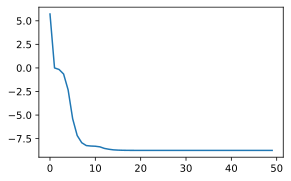

In [25]:
plt.plot(losses)

In [32]:
print(type(losses[-1]))

<class 'memoryview'>


In [ ]:
def energy(parameters):
    gamma, beta = [], []
    for i in range(p):
        gamma.append(parameters[2*i])
        beta.append(parameters[2*i+1])
    E = qaoa_sim.energy_expectation(G, alpha, gamma, beta)
    
    return E

In [ ]:
def calculate_single_solution(G, nc, reg, n, ps, pbar, output_steps):
    random.seed()
    output_dict={}

    #for regular graphs:
    #G = nx.random_regular_graph(reg, n)

    #for Erdos Renyi graphs:
    #prob = reg/(n-1) 
    #G = nx.erdos_renyi_graph(n, prob)

    output_dict["graph"] = G

    size_indep_set_min_greedy = greedy_mis(G)
    output_dict["size_indep_set_min_greedy"] = size_indep_set_min_greedy

    size_indep_set_random_greedy = random_greedy_mis(G)
    output_dict["size_indep_set_random_greedy"] = size_indep_set_random_greedy
    
    problem = Generator.MIS(G)

    expectation_values_single = SingleLayerQAOAExpectationValues(problem)
    qiro_single = QIRO_MIS(nc, expectation_values_single)
    #qiro_single.execute()
    qiro_single.execute()
    solution_single = qiro_single.solution
    size_indep_set_qiro_single = np.sum(solution_single >= 0)
    output_dict["output_single_p"] = [size_indep_set_qiro_single, solution_single]

    results_qtensor = {}

    for p in ps:
        print(f"\nRight now calculating p={p}")
        expectation_values_Qtensor = QtensorQAOAExpectationValuesMIS(problem, p, pbar=pbar)
        qiro_qtensor = QIRO_MIS(nc, expectation_values_Qtensor, output_steps=output_steps)
        start_time = time()
        #qiro_qtensor.execute()
        qiro_qtensor.execute()
        end_time = time()
        solution_qtensor = qiro_qtensor.solution
        size_indep_set_qiro_qtensor = np.sum(solution_qtensor >= 0)  
        results_qtensor[f'p={p}'] = [size_indep_set_qiro_qtensor, solution_qtensor]

    output_dict["output_qtensor"] = results_qtensor
    
    return output_dict

def give_results(G, nc, reg, n, ps, number_of_cases, pbar=True, output_steps=True, parallel = False):
    if parallel==False:
        results_list = []
        for i in range(number_of_cases):
            result = calculate_single_solution(G, nc, reg, ns, ps, pbar, output_steps, number_of_cases)
            results_list.append(result)

    return results_list


In [ ]:
for regularity in reg: 
    for n in ns: 
        random.seed()
        output_dict={}

        #for regular graphs:
        G = nx.random_regular_graph(regularity, n)

        #for Erdos Renyi graphs:
        prob = regularity/(n-1) 
        G = nx.erdos_renyi_graph(n, prob)

        for p in ps:
            p=[p]
            results_dict = {}
            results_dict["General info"]={'reg': reg, 'p': p, 'n': n, 'number of cases': number_of_cases}
            print(f"\nRight now calculating regularity={regularity}, n={n}")
            results=give_results(G, nc, regularity, n, p, pbar=False, output_steps=False, parallel=True)
            results_dict[f"reg_{regularity}_n_{n}_p_{p[0]}"]= results
            #results_dict_all[f"reg_{regularity}_n_{n}_numCases_{number_of_cases}"]= results
